In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

***
## <font color = "blue"> Univariate analysis </font> 
***

In [3]:
titanic = pd.read_csv("train.csv")

In [4]:
titanic.shape

(891, 12)

In [5]:
titanic.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
294,295,0,3,"Mineff, Mr. Ivan",male,24.0,0,0,349233,7.8958,NaN,S
577,578,1,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39.0,1,0,13507,55.9000,E44,S
37,38,0,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,A./5. 2152,8.0500,NaN,S
79,80,1,3,"Dowdell, Miss. Elizabeth",female,30.0,0,0,364516,12.4750,NaN,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
713,714,0,3,"Larsson, Mr. August Viktor",male,29.0,0,0,7545,9.4833,NaN,S
248,249,1,1,"Beckwith, Mr. Richard Leonard",male,37.0,1,1,11751,52.5542,D35,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
393,394,1,1,"Newell, Miss. Marjorie",female,23.0,1,0,35273,113.2750,D36,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [6]:
# what is the dimension of a data set
titanic.shape[0] / titanic.shape[1]

74

In [7]:
titanic.describe()

C:\Users\Lenovo\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [46]:
survived = titanic[titanic.Survived == 1]
died = titanic[titanic.Survived == 0]

***
** <font color = "blue">  FEATURE ANALYSIS: FARE </font>**
***

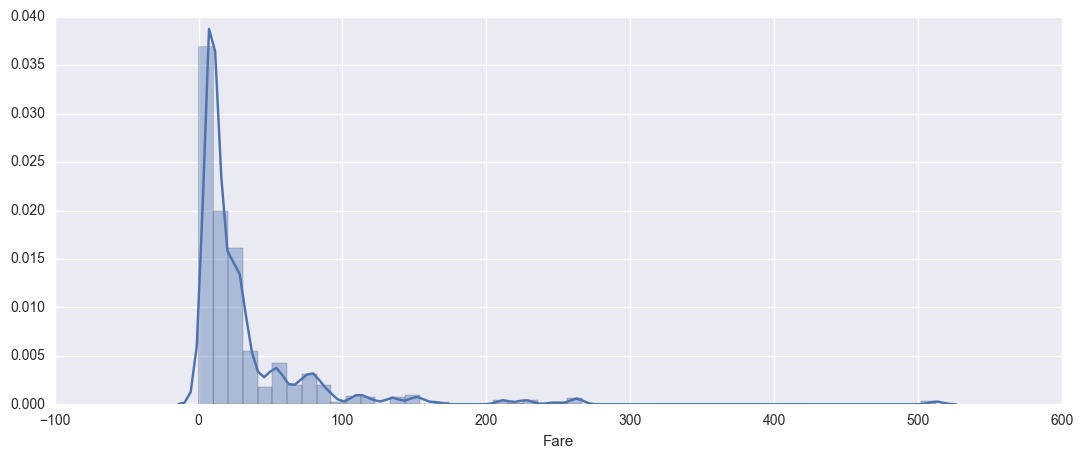

In [18]:

sns.distplot(titanic.Fare)
sns.set(rc={'figure.figsize':(10,5)})

In [24]:
fare = titanic.Fare
fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

1st and 3rd quartile are close but the max value is large. which might cause skewness. As shown on the graph of the feature fare is skewed to the right. 

In [25]:
fare.isnull().sum()

0

In [26]:
desc = fare.describe()

In [27]:
desc['max'] - desc['min']

512.32920000000001

In [28]:

(fare == 0.0 ).sum()

15

<font color = "green" size = '4'> __Why fare equals to zero?__ </font>

In [30]:
# maybe staff
titanic[fare == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [31]:
titanic.Ticket[titanic.Ticket == "LINE"]

179    LINE
271    LINE
302    LINE
597    LINE
Name: Ticket, dtype: object

In [32]:
titanic[fare == 0]["Pclass"].value_counts()

2    6
1    5
3    4
Name: Pclass, dtype: int64

<font color = "green"> these passengers have interesting properties: </font>
***

> * they are all male
> * almost all died 
> * only these group has a ticket LINE
> * they have neither children nor parents
***
***

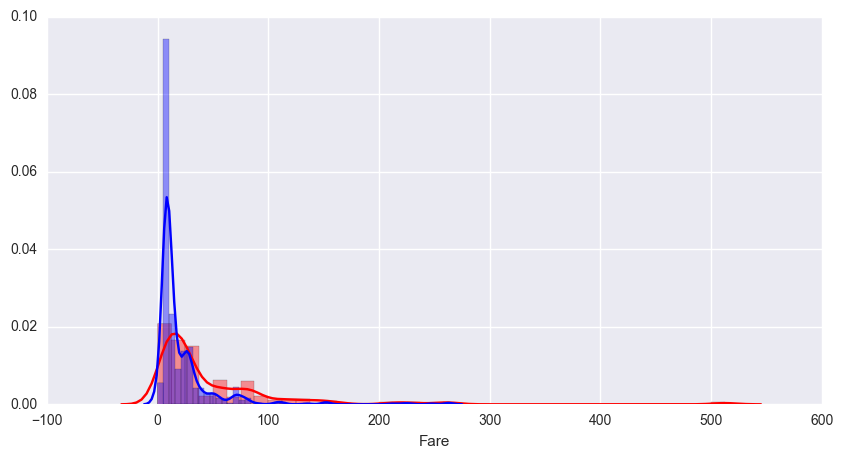

In [42]:
sns.distplot(fare[titanic.Survived == 1], color = "red",label= "survived")
sns.distplot(fare[titanic.Survived == 0], color = "blue")

In [45]:
survived

AttributeError: 'DataFrame' object has no attribute 'fare'

In [47]:
survived.Fare.mean()

48.39540760233917

In [49]:
died.Fare.mean()

22.117886885245877

In [51]:
survived.Fare.describe()

count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64

In [52]:
died.Fare.describe()

count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64

In [53]:
titanic.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [54]:
titanic.groupby("Pclass")["Fare"].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [55]:
titanic.groupby(["Survived", "Pclass"])["Fare"].mean()

Survived  Pclass
0         1         64.684008
          2         19.412328
          3         13.669364
1         1         95.608029
          2         22.055700
          3         13.694887
Name: Fare, dtype: float64

In [57]:
titanic.groupby(["Survived", "Pclass"])["PassengerId"].count()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: PassengerId, dtype: int64

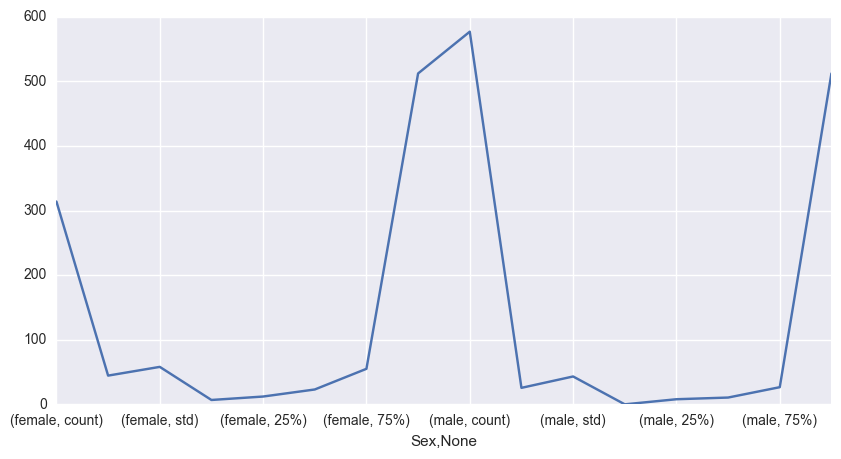

In [61]:
titanic.groupby(["Sex"])["Fare"].describe().plot()

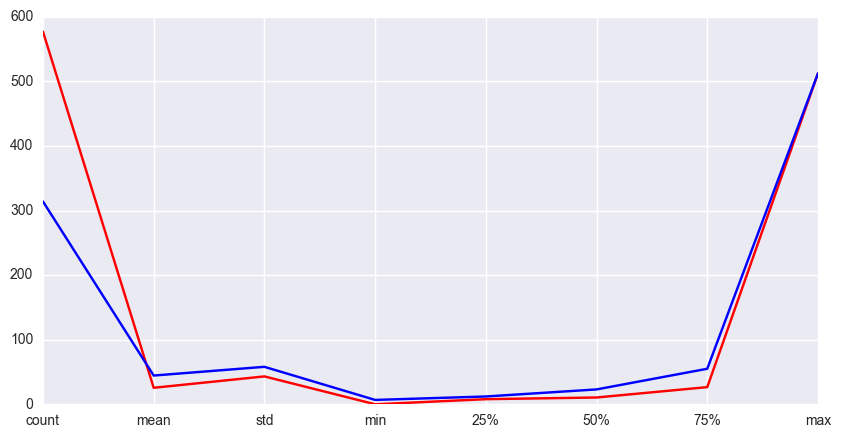

In [65]:
titanic[titanic.Sex == "male"]["Fare"].describe().plot(color = "red")
titanic[titanic.Sex == "female"]["Fare"].describe().plot(color = "blue")

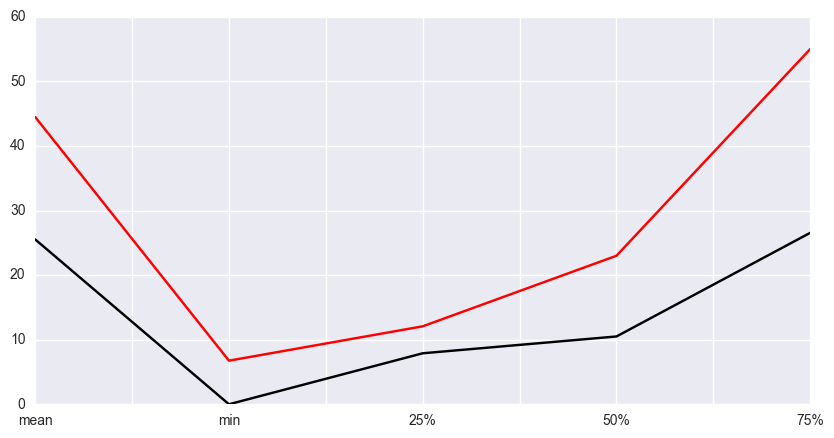

In [76]:
titanic[titanic.Sex == "male"]["Fare"].describe().ix[["mean", "min", "25%", "50%", "75%"]].plot(color = "black")
titanic[titanic.Sex == "female"]["Fare"].describe().ix[["mean", "min", "25%", "50%", "75%"]].plot(color = "red")

In [87]:
titanic.groupby(["Survived", "Sex"])["Fare"].describe()

Survived  Sex          
0         female  count     81.000000
                  mean      23.024385
                  std       24.821287
                  min        6.750000
                  25%        8.850000
                  50%       15.245800
                  75%       27.900000
                  max      151.550000
          male    count    468.000000
                  mean      21.960993
                  std       32.409799
                  min        0.000000
                  25%        7.795800
                  50%        9.416650
                  75%       26.000000
                  max      263.000000
1         female  count    233.000000
                  mean      51.938573
                  std       64.102256
                  min        7.225000
                  25%       13.000000
                  50%       26.000000
                  75%       76.291700
                  max      512.329200
          male    count    109.000000
                  mean    

In [83]:
titanic[["Fare", "Survived", "Sex"]].pivot_table(columns= "Survived", index= "Sex", aggfunc= np.mean)

Fare           
Survived          0          1
Sex                           
female    23.024385  51.938573
male      21.960993  40.821484

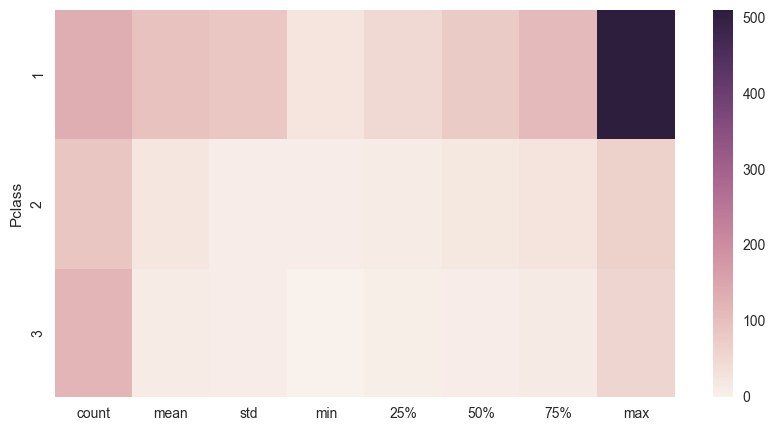

In [98]:
sns.heatmap(titanic[titanic.Survived == 1].groupby("Pclass")["Fare"].describe().unstack())

In [99]:
titanic[titanic.Survived == 1].groupby("Pclass")["Fare"].describe().unstack()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,136.0,95.608029,85.286820,25.9292,50.98545,77.9583,111.481225,512.3292
2,87.0,22.055700,10.853502,10.5000,13.00000,21.0000,26.250000,65.0000
3,119.0,13.694887,10.692993,0.0000,7.77500,8.5167,15.875000,56.4958


In [101]:
titanic[titanic.Survived == 0].groupby("Pclass")["Fare"].describe().unstack()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,80.0,64.684008,60.662089,0.0,27.7427,44.75,78.93750,263.00
2,97.0,19.412328,15.307175,0.0,11.5000,13.00,26.00000,73.50
3,372.0,13.669364,12.118338,0.0,7.7500,8.05,15.13645,69.55


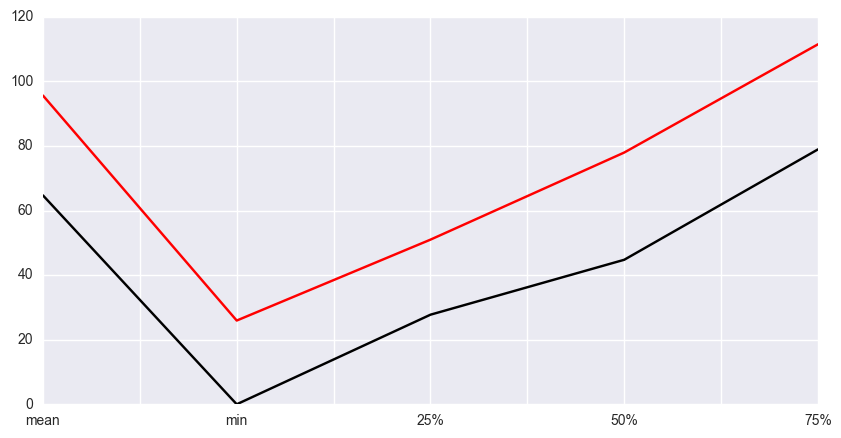

In [112]:
titanic[(titanic.Survived == 0) & (titanic.Pclass == 1 )]["Fare"].describe().ix[["mean", "min", "25%", "50%", "75%"]].plot(color = "black")
titanic[(titanic.Survived == 1) & (titanic.Pclass == 1 )]["Fare"].describe().ix[["mean", "min", "25%", "50%", "75%"]].plot(color = "red")

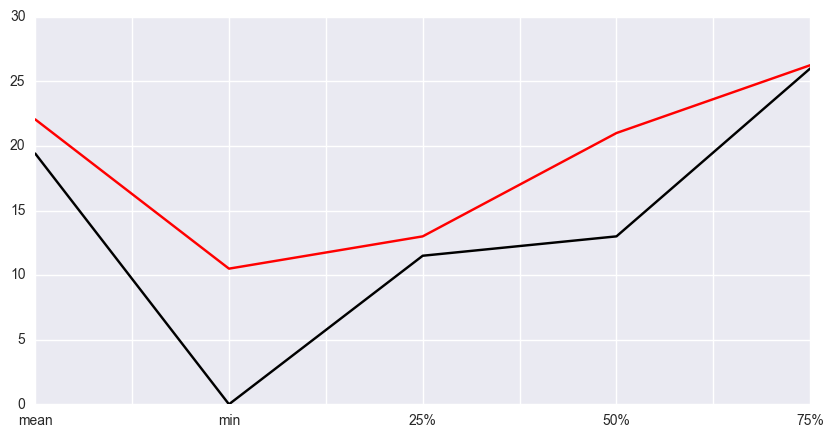

In [113]:
titanic[(titanic.Survived == 0) & (titanic.Pclass == 2 )]["Fare"].describe().ix[["mean", "min", "25%", "50%", "75%"]].plot(color = "black")
titanic[(titanic.Survived == 1) & (titanic.Pclass == 2 )]["Fare"].describe().ix[["mean", "min", "25%", "50%", "75%"]].plot(color = "red")

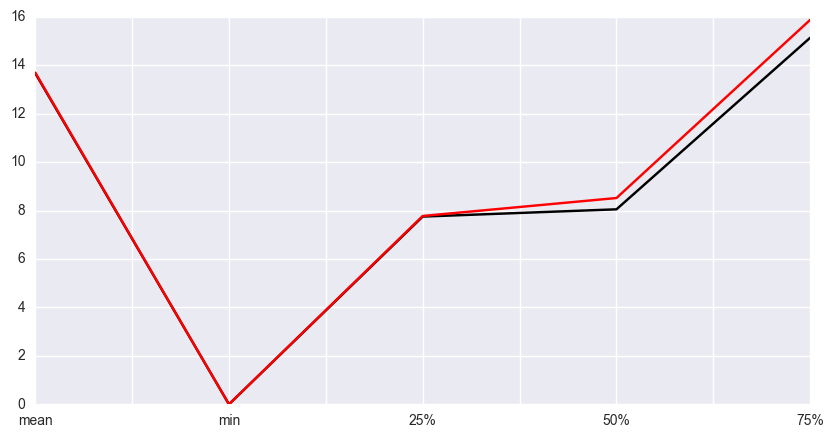

In [114]:
titanic[(titanic.Survived == 0) & (titanic.Pclass == 3 )]["Fare"].describe().ix[["mean", "min", "25%", "50%", "75%"]].plot(color = "black")
titanic[(titanic.Survived == 1) & (titanic.Pclass == 3 )]["Fare"].describe().ix[["mean", "min", "25%", "50%", "75%"]].plot(color = "red")